<a href="https://colab.research.google.com/github/qmeng222/transformers-for-NLP/blob/main/Pipeline_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# `!` operator tells the notebook cell that this line is not a Python code, its a command line script
!pip install transformers # install the Hugging Face Transformers library

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 43.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 36.0 MB/s eta 0:00:00


In [3]:
# Twitter US Airline Sentiment: https://www.kaggle.com/crowdflower/twitter-airline-sentiment
# `wget` command is a utility for downloading files from the internet.
# `-nc` is an option for the `wget` command. -nc stands for "no-clobber." It instructs wget not to overwrite files that already exist in the current directory. If the file you're trying to download already exists, the -nc flag prevents it from being downloaded again.
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2023-11-04 04:43:38--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  4.28MB/s    in 0.8s    

2023-11-04 04:43:40 (4.28 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [4]:
# import the `pipeline` function from the HF Transformers library
# the `pipeline` class is a convenient way to perform NLP tasks using pre-trained models
from transformers import pipeline

import numpy as np # import the `numpy` library for numerical computations in Python
import pandas as pd # import the `pandas` library for data manipulation and analysis (in DataFrames)
import seaborn as sn #  import the `seaborn` library for data visualization

# import functions from the `sklearn.metrics` module within the `scikit-learn` library
# roc_auc_score (Receiver Operating Characteristic Area Under the Curve Scroe) for evaluating binary classification models
# f1_score computes the F1 score for evaluating classification models
# confusion_matrix computes a table that summarizes the performance of a classification model
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

# Basic usage (on CPU):

In [5]:
# initialize a sentiment analysis model & assign it to a variable:
classifier = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [6]:
type(classifier) # text classification pipeline

transformers.pipelines.text_classification.TextClassificationPipeline

In [7]:
# output is a dictionary:
classifier("This is such a great movie!")

[{'label': 'POSITIVE', 'score': 0.9998759031295776}]

In [8]:
classifier("This show was not interesting")

[{'label': 'NEGATIVE', 'score': 0.9997871518135071}]

In [9]:
classifier("I can't say that this was a good movie")

[{'label': 'NEGATIVE', 'score': 0.9278441071510315}]

In [10]:
# multiple inputs passed in as a list:
classifier([
  "This course is just what I needed.",
  "I can't understand any of this. Instructor kept telling me to meet the \
   prerequisites. What are prerequisites? Why does he keep saying that?"
])

[{'label': 'POSITIVE', 'score': 0.9991594552993774},
 {'label': 'NEGATIVE', 'score': 0.9966675639152527}]

👆 The output is a list too.

# Let's work on GPU:

In [11]:
import torch # import the PyTorch library for tensor computations

In [12]:
torch.cuda.is_available()

True

In [13]:
torch.cuda.current_device()

0

In [14]:
# device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
# create a new sentiment analysis model pipeline & run the sentiment analysis model on GPU:
classifier = pipeline("sentiment-analysis", device=0)

No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [15]:
# read data from a Comma Separated Values file & store it in a DataFrame object
# `_` at the end of a variable name is a common convention in Python for naming temporary variable
df_ = pd.read_csv('AirlineTweets.csv')

In [16]:
type(df_) # Pandas DataFrame object

pandas.core.frame.DataFrame

In [17]:
# retrieve the first 5 rows of the Pandas DataFrame object
df_.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [18]:
#  create a new DataFrame by copying the selected columns ('airline_sentiment' and 'text'):
df = df_[['airline_sentiment', 'text']].copy()

<Axes: >

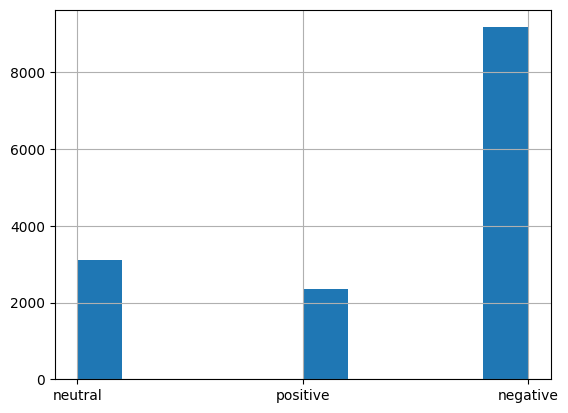

In [19]:
# create a histogram of a specific column in a DataFrame:
df['airline_sentiment'].hist()

👆dominant neg reviews

In [21]:
# create another DataFrame by filtering a selected column (bc my model cannot make neutral sentiment analysis):
df = df[df.airline_sentiment != 'neutral'].copy()
df.head()

,airline_sentiment,text
1,positive,@VirginAmerica plus you've added commercials t...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...
5,negative,@VirginAmerica seriously would pay $30 a fligh...
6,positive,"@VirginAmerica yes, nearly every time I fly VX..."


<Axes: >

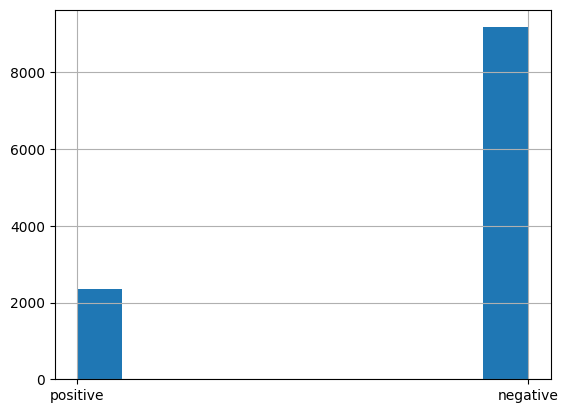

In [31]:
df['airline_sentiment'].hist()

In [23]:
target_map = {'positive': 1, 'negative': 0}
df['target'] = df['airline_sentiment'].map(target_map)
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [24]:
len(df) # for runtime estimation

11541

In [29]:
texts = df['text'].tolist() # gather reviews in a list
print(type(texts))
print(len(texts))
print(texts[:5])

<class 'list'>
11541
["@VirginAmerica plus you've added commercials to the experience... tacky.", '@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse', "@VirginAmerica and it's a really big bad thing about it", "@VirginAmerica seriously would pay $30 a flight for seats that didn't have this playing.\nit's really the only bad thing about flying VA", '@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)']


In [30]:
predictions = classifier(texts)

In [33]:
# for multiple inputs passed in as a list, output is also a list:
predictions[:5]

[{'label': 'POSITIVE', 'score': 0.6070823669433594},
 {'label': 'NEGATIVE', 'score': 0.9973449110984802},
 {'label': 'NEGATIVE', 'score': 0.9995823502540588},
 {'label': 'NEGATIVE', 'score': 0.9854250550270081},
 {'label': 'POSITIVE', 'score': 0.9553212523460388}]

In [37]:
# for loop:
probs = [d['score'] if d['label'].startswith('P') else 1 - d['score'] for d in predictions]
probs[:5]

[0.6070823669433594,
 0.0026550889015197754,
 0.0004176497459411621,
 0.014574944972991943,
 0.9553212523460388]

In [38]:
# another for loop:
preds = [1 if d['label'].startswith('P') else 0 for d in predictions]
preds[:5]

[1, 0, 0, 0, 1]

In [39]:
print(type(preds))
preds = np.array(preds) # list -> np array
print(type(preds))

<class 'list'>
<class 'numpy.ndarray'>


In [40]:
df['target']

1        1
3        0
4        0
5        0
6        1
        ..
14633    0
14634    0
14635    1
14636    0
14638    0
Name: target, Length: 11541, dtype: int64

In [43]:
print(type(df['target']))
print(type(preds))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [44]:
# compute accuracy:
print("acc:", np.mean(df['target'] == preds))

acc: 0.8898708950697514


# Compute the confusion matrix:

In [47]:
# cm = confusion_matrix(df['target'], preds)
# cm

array([[8271,  907],
       [ 364, 1999]])

In [49]:
# calculate confusion matrix with normalized values:
cm = confusion_matrix(df['target'], preds, normalize='true')
cm

array([[0.90117673, 0.09882327],
       [0.15404147, 0.84595853]])

👆large numbers along the diagonal, that's great🎉

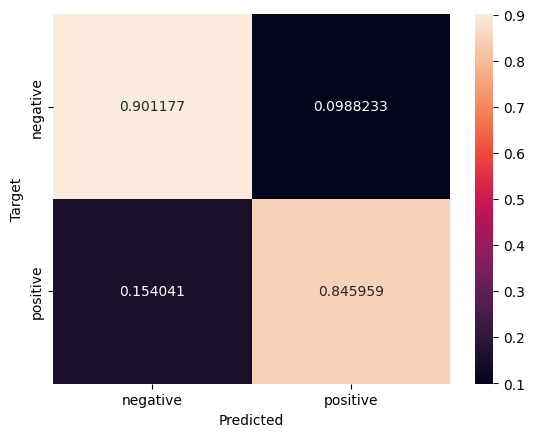

In [50]:
# plot the confusion matrix:

def plot_cm(cm):
  classes = ['negative', 'positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm) # call the func

# Calculate binary classification performance metrics - F1 scores:

In [51]:
f1_score(df['target'], preds)

0.7587777566900741

In [52]:
f1_score(1 - df['target'], 1 - preds) # compute f1 for reversed labels (converting 0 to 1 and 1 to 0)

0.928647616908999

👆The model is effective at making accurate positive predictions while capturing most positive instances. It has a good balance between precision and recall.

# Calculate binary classification performance metrics - ROC-AUC scores:

In [59]:
roc_auc_score(df['target'], probs)

0.9485933999009757

In [58]:
roc_auc_score(1 - df['target'], 1 - np.array(probs)) # compute auc for reversed labels

0.9485933999009756

👆A higher ROC-AUC score indicates better discrimination performance, while a score close to 0.5 suggests that the model's performance is not significantly better than random guessing.